In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("train1.csv") 
df2 = pd.read_csv("train2.csv")
display(df1.head())
display(df2.head())

,x1,x2,y
0,4.786214,4.650073,1.0
1,3.170196,4.005515,1.0
2,5.000920,4.897350,1.0
3,4.522969,6.215182,0.0
4,3.599857,5.564085,0.0


,x1,x2,y
0,3.614646,2.924913,1.0
1,5.626771,8.359861,0.0
2,4.578809,5.688260,1.0
3,4.616945,7.350656,0.0
4,4.682481,6.423178,0.0


## Part A: Examine training sets

### Calculation of covariance matrices for train1 and train2

In [3]:
# train1 dataset covariance matrices of each class

df1_class0 = df1[df1['y']==0] # get class 0 values

df1_class0_X = df1_class0[["x1", "x2"]].values # get feature values of class 0

# Calculate the covariance matrix of class 0 manually
df1_class0_cov = (df1_class0_X - np.mean(df1_class0_X, axis=0)).T @ \
              (df1_class0_X - np.mean(df1_class0_X, axis=0)) / len(df1_class0_X)

df1_class1 = df1[df1['y']==1] # get class 1 values

df1_class1_X = df1_class1[["x1", "x2"]].values # get feature values of class 1

# Calculate the covariance matrix of class 1 manually
df1_class1_cov = (df1_class1_X - np.mean(df1_class1_X, axis=0)).T @ \
              (df1_class1_X - np.mean(df1_class1_X, axis=0)) / len(df1_class1_X)

print(f"Class 0 Covariance Matrix:\n {df1_class0_cov}")
print(f"\nClass 1 Covariance Matrix:\n {df1_class1_cov}")

Class 0 Covariance Matrix:
 [[0.30779503 0.20875556]
 [0.20875556 0.403941  ]]

Class 1 Covariance Matrix:
 [[0.30779503 0.20875556]
 [0.20875556 0.403941  ]]


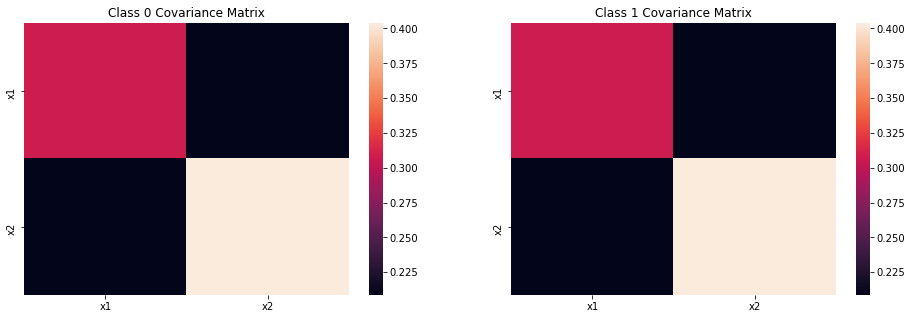

In [4]:
# visualization of train1 dataset covariance matrices

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.heatmap(df1_class0_cov,  xticklabels=["x1", "x2"], 
            yticklabels=["x1", "x2"], ax=axs[0])
axs[0].set_title('Class 0 Covariance Matrix')

sns.heatmap(df1_class1_cov,  xticklabels=["x1", "x2"], 
            yticklabels=["x1", "x2"], ax=axs[1])
axs[1].set_title('Class 1 Covariance Matrix', )

plt.show()

For the dataset 1, covariance matrices of class 0 and class 1 are positive and equal to each other. It is suitable to use linear bayes classifier for this dataset.

In [5]:
# train2 dataset covariance matrices of each class

df2_class0 = df2[df2['y']==0] # get class 0 values

df2_class0_X = df2_class0[["x1", "x2"]].values # get feature values of class 0

# Calculate the covariance matrix of class 0 manually
df2_class0_cov = (df2_class0_X - np.mean(df2_class0_X, axis=0)).T @ \
              (df2_class0_X - np.mean(df2_class0_X, axis=0)) / len(df2_class0_X)

df2_class1 = df2[df2['y']==1] # get class 1 values

df2_class1_X = df2_class1[["x1", "x2"]].values # get feature values of class 1

# Calculate the covariance matrix of class 1 manually
df2_class1_cov = (df2_class1_X - np.mean(df2_class1_X, axis=0)).T @ \
              (df2_class1_X - np.mean(df2_class1_X, axis=0)) / len(df2_class1_X)

print(f"Class 0 Covariance Matrix:\n {df2_class0_cov}")
print(f"\nClass 1 Covariance Matrix:\n {df2_class1_cov}")

Class 0 Covariance Matrix:
 [[0.29913689 0.19183728]
 [0.19183728 0.3972486 ]]

Class 1 Covariance Matrix:
 [[0.77441134 0.08920795]
 [0.08920795 0.52736643]]


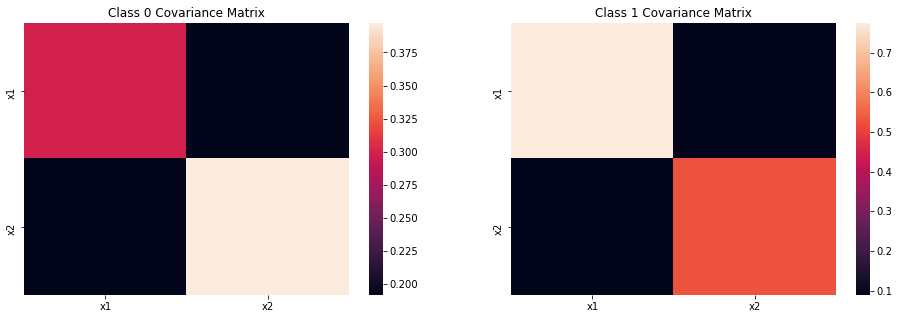

In [6]:
# visualization of train2 dataset covariance matrices

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.heatmap(df2_class0_cov,  xticklabels=["x1", "x2"], 
            yticklabels=["x1", "x2"], ax=axs[0])
axs[0].set_title('Class 0 Covariance Matrix')

sns.heatmap(df2_class1_cov,  xticklabels=["x1", "x2"], 
            yticklabels=["x1", "x2"], ax=axs[1])
axs[1].set_title('Class 1 Covariance Matrix', )

plt.show()

For the dataset 2, covariance matrices of class 0 and class 1 are positive and different from each other. It is not suitable to use linear bayes classifier for this dataset. When calculating the discriminant functions quadratic form of the equation must be used.

### Histograms for train1 and train2 datasets


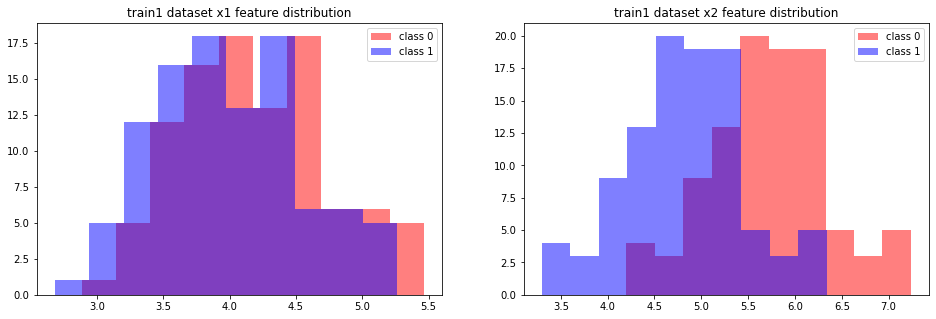

In [7]:
# train1 dataset

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

axs[0].hist(df1_class0_X[:,0], color='red', alpha=0.5, label="class 0")
axs[0].hist(df1_class1_X[:,0], color='blue', alpha=0.5, label="class 1")
axs[0].legend(loc='upper right')
axs[0].set_title("train1 dataset x1 feature distribution")

axs[1].hist(df1_class0_X[:,1], color='red', alpha=0.5, label="class 0")
axs[1].hist(df1_class1_X[:,1], color='blue', alpha=0.5, label="class 1")
axs[1].legend(loc='upper right')
axs[1].set_title("train1 dataset x2 feature distribution")

plt.show()

For the dataset 1, x1 feature distributions for each class generally coincide with each other and that means there is big data fracture. However, when we compare the x2 feature distributions for each class there is far less data fracture. From this we can infer that bayes classifier will generally focus on x2 feature values when doing predictions on the new samples. But still both feature distributions have data fractures and there definitely will be classification error occurence.

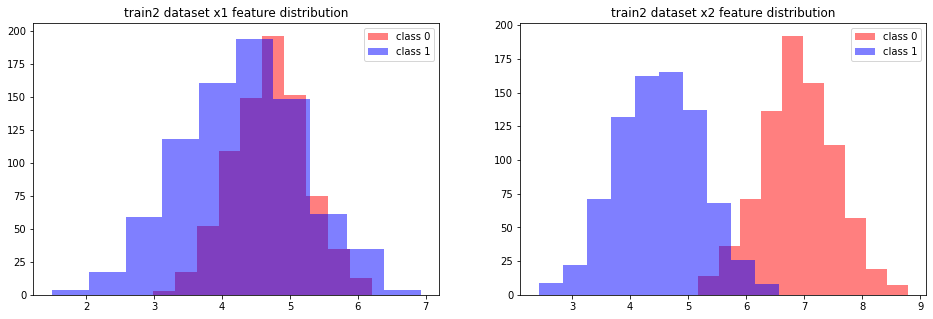

In [8]:
# train2 dataset

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

axs[0].hist(df2_class0_X[:,0], color='red', alpha=0.5, label="class 0")
axs[0].hist(df2_class1_X[:,0], color='blue', alpha=0.5, label="class 1")
axs[0].legend(loc='upper right')
axs[0].set_title("train2 dataset x1 feature distribution")

axs[1].hist(df2_class0_X[:,1], color='red', alpha=0.5, label="class 0")
axs[1].hist(df2_class1_X[:,1], color='blue', alpha=0.5, label="class 1")
axs[1].legend(loc='upper right')
axs[1].set_title("train2 dataset x2 feature distribution")

plt.show()

For the dataset 2, just like the dataset 1 there is a huge data fracture in the x1 feature distributions for each class. x2 feature distributions have only small amount of data fracture. Bayes classifier will again focus on the x2 feature values when doing predictions. However for this dataset I think the accuracy rate will be much greater than the dataset 1 accuracy rate.

### 4. Training datasets features scatter plots


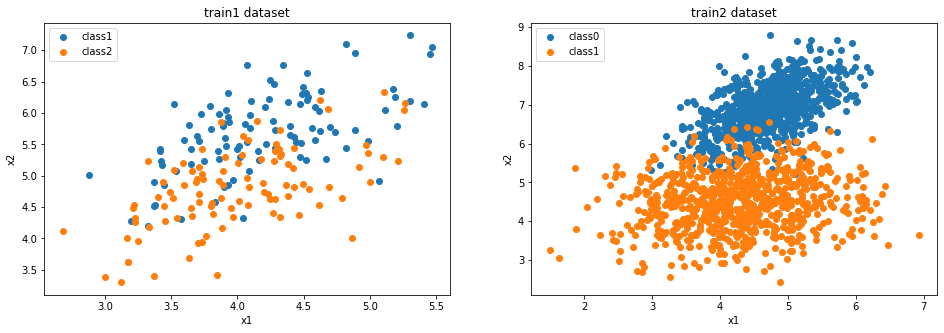

In [9]:
# train1 dataset

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

axs[0].scatter(df1_class0_X[:, 0], df1_class0_X[:, 1])
axs[0].scatter(df1_class1_X[:, 0], df1_class1_X[:, 1])
axs[0].legend(["class1", "class2"], loc="upper left")
axs[0].set_xlabel("x1")
axs[0].set_ylabel("x2")
axs[0].set_title("train1 dataset")

axs[1].scatter(df2_class0_X[:, 0], df2_class0_X[:, 1])
axs[1].scatter(df2_class1_X[:, 0], df2_class1_X[:, 1])
axs[1].legend(["class0", "class1"], loc="upper left")
axs[1].set_xlabel("x1")
axs[1].set_ylabel("x2")
axs[1].set_title("train2 dataset")

plt.show()

## PART B:

In [10]:
# read the testing sets
test1 = pd.read_csv("test1.csv")
test2 = pd.read_csv("test2.csv")
display(test1.head())
display(test2.head())

,x1,x2,y
0,4.834707,5.518777,1.0
1,3.758435,4.227406,1.0
2,4.195908,5.421247,0.0
3,3.696578,5.595470,0.0
4,4.766536,5.451948,0.0


,x1,x2,y
0,4.418160,5.223632,1.0
1,4.509276,5.495003,0.0
2,5.131102,4.692929,1.0
3,4.159342,7.058550,0.0
4,3.872938,5.929577,0.0


### Estimating the Mean Vectors

In [11]:
# train1 dataset class 0 mean vector and covariance matrix:
df1_class0_mean = np.mean(df1_class0_X, axis=0)
print(f"train1 dataset class 0 mean vector: {df1_class0_mean}")
print(f"\ntrain1 dataset class 0 covariance matrix:\n {df1_class0_cov}")

train1 dataset class 0 mean vector: [4.2 5.7]

train1 dataset class 0 covariance matrix:
 [[0.30779503 0.20875556]
 [0.20875556 0.403941  ]]


In [12]:
# train1 dataset class 1 mean vector:
df1_class1_mean = np.mean(df1_class1_X, axis=0)
print(f"train1 dataset class 1 mean vector: {df1_class1_mean}")
print(f"\ntrain1 dataset class 1 covariance matrix:\n {df1_class1_cov}")

train1 dataset class 1 mean vector: [4.  4.8]

train1 dataset class 1 covariance matrix:
 [[0.30779503 0.20875556]
 [0.20875556 0.403941  ]]


In [13]:
# train2 dataset class 0 mean vector and covariance matrix:
df2_class0_mean = np.mean(df2_class0_X, axis=0)
print(f"train2 dataset class 0 mean vector: {df2_class0_mean}")
print(f"\ntrain2 dataset class 0 covariance matrix:\n {df2_class0_cov}")

train2 dataset class 0 mean vector: [4.69156024 6.8893364 ]

train2 dataset class 0 covariance matrix:
 [[0.29913689 0.19183728]
 [0.19183728 0.3972486 ]]


In [14]:
# train2 dataset class 1 mean vector:
df2_class1_mean = np.mean(df2_class1_X, axis=0)
print(f"train2 dataset class 1 mean vector: {df2_class1_mean}")
print(f"\ntrain2 dataset class 1 covariance matrix:\n {df2_class1_cov}")

train2 dataset class 1 mean vector: [4.29725029 4.50444121]

train2 dataset class 1 covariance matrix:
 [[0.77441134 0.08920795]
 [0.08920795 0.52736643]]


### Calculation of Discriminant Functions

Note that discriminant functions are calculated inside the bayes_classifier function and discriminant values for each testing sample are added to the list defined as g. Equal covariance matrices and general case automatically determined inside the function by looking at the covariance matrices belonging to each class. 

In [15]:
def bayes_classifier(X_train, y_train, X_test):
    """
    X_train, y_train, X_test arguments must be given as numpy array.
    """

    # get the number of rows and columns of X_train
    num_rows, num_cols = X_train.shape 

    # determine the unique labels and number of features belongs to them
    unique_labels, unique_label_counts = np.unique(y_train, return_counts=True)

    # determine the priors for each class
    priors = unique_label_counts / num_rows

    mean_class = []
    cov_matrices = []
    for i in unique_labels: # loop over the unique labels

        # get the feature values of each unique label
        x_temp = X_train[y_train == i] 

        # calculate covariance matrix of feature values belonging to each unique 
        # label and append it to cov_matrices list. 
        cov_matrices.append(np.cov(x_temp, rowvar=False))
        
        # append the mean vector of each class to mean_class list:
        mean_class.append(np.mean(X_train[y_train == i], axis=0))

    mean_class = np.array(mean_class) # change the classes mean object from list
    # to a numpy array 

    len_cov_list = len(cov_matrices) # number of classes or covariance matrices

    # check if covariance matrices are equal
    cov_matrices = np.array(cov_matrices)
    cov_matrices = cov_matrices.round(decimals=4)
    result = np.all(cov_matrices == cov_matrices[0])

    if result == True: # equal covariance matrices case            
         
        # Inverse of the covariance matrix. Pseudo inverse is used to avoid any 
        # mathematical errors.
        cov_matrix_inv = np.linalg.pinv(cov_matrices[0])
        
        # calculation of w in discriminant function for each class
        w  = [np.matmul(cov_matrix_inv, mean_class[i]) for i in \
              range(len_cov_list)] 

        # calculation of w0 in discriminant function for each class
        w0 = [np.dot(np.dot(-0.5 * mean_class[i].T, cov_matrix_inv), 
                mean_class[i]) + np.log(priors[i]) for i in range(len_cov_list)]

        # classification of test samples:
        y_preds = []
        for sample in X_test: # loop over the test samples
            g = [] # discriminant values

            for j in range(len(unique_labels)): # loop over the unique labels
                # calculate the discriminant values for each class and append it
                # to g list.
                g.append(np.matmul(w[j].T, sample) + w0[j])
        
        # select the index of the greatest discriminant value as predicted value
            y_preds.append(np.argmax(np.array(g)))

        return (np.array(y_preds), [[i.T, j] for i, j in zip(w, w0)])

    if result != True: # general case
    
        # Calculation of inverse of the covariance matrices. Pseudo inverse is 
        # used to avoid any mathematical errors.
        cov_matrices_inv = [np.linalg.pinv(cov_matrices[i]) for i in \
                                                            range(len_cov_list)]
        
        # calculation of W in discriminant function for each class
        W = [-0.5 * cov_matrices_inv[i] for i in range(len_cov_list)]
            
        
        # calculation of w in discriminant function for each class
        w = [cov_matrices_inv[i] @ mean_class[i] for i in range(len_cov_list)]

        # calculation of w0 in discriminant function for each class
        w0 = [(-0.5 * mean_class[i].T @ cov_matrices_inv[i]) @ mean_class[i] - \
                0.5 * np.log(np.linalg.det(cov_matrices[i])) + \
              np.log(priors[i]) for i in range(len_cov_list)]

        # classification of test samples:
        y_preds = []
        for sample in X_test: # loop over the test samples
            g = [] # discriminant values

            for j in range(len(unique_labels)): # loop over the unique labels
                # calculate the discriminant values for each class and append it
                # to g list.
                g.append((sample.T @ W[j]) @ sample + (w[j].T @ sample) + w0[j])
        
        # select the index of the greatest discriminant value as predicted value
            y_preds.append(np.argmax(np.array(g)))

        return (np.array(y_preds), [[i, j.T, k] for i, j, k in zip(W, w, w0)])


### Testing the Bayes Classifier Function

In [16]:
# Equal covariance matrices case is valid for the first dataset and the 
# coefficients of discriminant functions w.T and w0 are printed below.  
y_preds1, g1 = bayes_classifier(df1[["x1", "x2"]].values, df1["y"].values, 
                                test1[["x1", "x2"]].values)
g1

[[array([ 6.20954228, 10.76080278]), -44.40147388210168],
 [array([7.5232744 , 7.87583683]), -34.64170438800326]]

In [17]:
# General case is valid for the second dataset where covariance matrices are 
# different from each other. Coefficients of discriminant function W, w.T and w0
# are printed below.  
y_preds2, g2 = bayes_classifier(df2[["x1", "x2"]].values, df2["y"].values, 
                           test2[["x1", "x2"]].values)
g2

[[array([[-2.41884257,  1.16836726],
         [ 1.16836726, -1.82158247]]),
  array([ 6.59774112, 14.13605816]),
  -63.61478030153961],
 [array([[-0.65763791,  0.1112255 ],
         [ 0.1112255 , -0.96578113]]),
  array([4.65005194, 7.74468102]),
  -27.670743181030762]]

In [18]:
def calc_error(actual, predicted):
    """Error calculation function"""
    error = 0
    for i in range(len(actual)):
        if actual[i] != predicted[i]:
            error += 1
    
    return error / float(len(actual)) * 100

In [19]:
error = calc_error(test1.y.values, y_preds1)
print('Dataset 1 error rate: %.2f%%' % error)

Dataset 1 error rate: 20.00%


In [20]:
error = calc_error(test2.y.values, y_preds2)
print('Dataset 2 error rate: %.2f%%' % error)

Dataset 2 error rate: 3.00%


## PART C:

### Combine the Training Set and the Test Set

In [21]:
# Combination of first dataset
df1_combined = pd.concat([df1, test1], axis=0)
print(df1_combined.shape)
display(df1_combined.head())

(300, 3)


,x1,x2,y
0,4.786214,4.650073,1.0
1,3.170196,4.005515,1.0
2,5.000920,4.897350,1.0
3,4.522969,6.215182,0.0
4,3.599857,5.564085,0.0


In [22]:
# Combination of second dataset
df2_combined = pd.concat([df2, test2], axis=0)
print(df2_combined.shape)
display(df2_combined.head())

(2000, 3)


,x1,x2,y
0,3.614646,2.924913,1.0
1,5.626771,8.359861,0.0
2,4.578809,5.688260,1.0
3,4.616945,7.350656,0.0
4,4.682481,6.423178,0.0


### Applying 3-fold Cross-validation

In [23]:
def split_to_folds(dataset, n_folds):
    """"This function splits the data into n_folds."""
    # dataset argument must be given as numpy array and n_folds as integer.
    
    np.random.shuffle(dataset) # mix the dataset

    # Determine number of samples each fold takes. Number of samples each fold
    # takes can actually be different if the number of folds we want to use is 
    # not divisible with the number of samples.
    fold_lengths = [len(dataset) // n_folds for i in range(n_folds)]
    fold_lengths[-1] += len(dataset) % n_folds

    dataset_split = []
    j = 0
    for i in fold_lengths: # loop over the number of fold elements
        # append the fold values to dataset_split list
        dataset_split.append(dataset[j:j+i, :]) 
        j += i

    return dataset_split

In [24]:
def cross_validation(dataset, n_folds):
    """"This function first uses split_to_folds function to split the data into
    given number of folds. Later at each step one of the folds is taken as test
    set and the others as training sets and error rate is calculated using the 
    function bayes_classifier defined above.
    """
    folds = split_to_folds(dataset, n_folds)
    errors = []
    for i in range(len(folds)):
        train_set = folds.copy()
        train_set.pop(i)
        train_set = np.vstack(train_set)
        test_set = folds[i]

        # make predictions using bayes_classifier function defined above
        preds, g = bayes_classifier(np.array(train_set)[:, :-1],
                                 np.array(train_set)[:, -1],
                                 np.array(test_set)[:, :-1])
        
        # calculate the error rate using the calc_error function defined above
        e = calc_error(np.array(test_set)[:, -1], preds)

        # append the calculated error rate to the errors list
        errors.append(e) 

    return errors # return the list error rates

In [25]:
# Dataset1 errors:
err = cross_validation(df1_combined.values, 3)
print("Dataset1 errors:")
print(f"Error list: {np.round(np.array(err), 2)}")
print(f"Mean Error: {round(np.mean(np.array(err)), 2)}")

Dataset1 errors:
Error list: [19. 24. 21.]
Mean Error: 21.33


In [26]:
# Dataset2 errors:
err = cross_validation(df2_combined.values, 3)
print("Dataset2 errors:")
print(f"Error list: {np.round(np.array(err), 2)}")
print(f"Mean Error: {round(np.mean(np.array(err)), 2)}")

Dataset2 errors:
Error list: [3.3  1.95 4.04]
Mean Error: 3.1


Results that were obtained with and without cross-validation are slightly different from each other in our case. However for another problem this might not be the case and results could have been pretty different from each other. That is why in order to take into account of the all training dataset samples doing cross-validation is more reliable. 

## Part D:

In [28]:
# read the modified train2 dataset
df2m = pd.read_csv("train2_modified.csv")
df2m.head()

,x1,x2,y
0,3.810828,6.928757,1.0
1,4.376219,6.141752,0.0
2,5.092311,6.931234,0.0
3,4.358281,7.324346,0.0
4,5.379770,7.549258,1.0


In [29]:
# modified train2 dataset

df2m_class0 = df2m[df2m['y']==0] # get class 0 values

df2m_class0_X = df2m_class0[["x1", "x2"]].values # get feature values of class 0

df2m_class1 = df2m[df2m['y']==1] # get class 1 values

df2m_class1_X = df2m_class1[["x1", "x2"]].values # get feature values of class 1

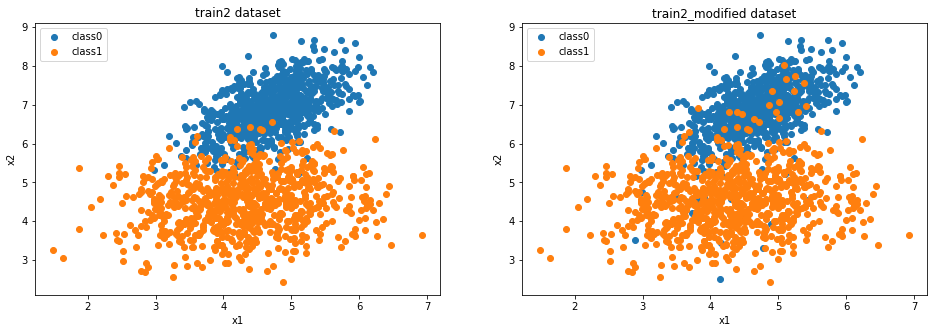

In [30]:
# train2 and train2_modified datasets

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

axs[0].scatter(df2_class0_X[:, 0], df2_class0_X[:, 1])
axs[0].scatter(df2_class1_X[:, 0], df2_class1_X[:, 1])
axs[0].legend(["class0", "class1"], loc="upper left")
axs[0].set_xlabel("x1")
axs[0].set_ylabel("x2")
axs[0].set_title("train2 dataset")

axs[1].scatter(df2m_class0_X[:, 0], df2m_class0_X[:, 1])
axs[1].scatter(df2m_class1_X[:, 0], df2m_class1_X[:, 1])
axs[1].legend(["class0", "class1"], loc="upper left")
axs[1].set_xlabel("x1")
axs[1].set_ylabel("x2")
axs[1].set_title("train2_modified dataset")

plt.show()

If we compare the train2 and train2_modified datasets it is obvious that train2_modified dataset has outliers and sample values are more mixed up.

In [31]:
y_preds, g = bayes_classifier(df2m[["x1", "x2"]].values, df2m["y"].values, 
                           test2[["x1", "x2"]].values)

err = calc_error(test2.y.values, y_preds)
print('Classification Error for dataset2_modified: %.2f%%' % err)

Classification Error for dataset2_modified: 2.50%


In [32]:
# Combination of second dataset (modified in this case)
df2m_combined = pd.concat([df2m, test2], axis=0)
print(df2m_combined.shape)
display(df2m_combined.head())

(2040, 3)


,x1,x2,y
0,3.810828,6.928757,1.0
1,4.376219,6.141752,0.0
2,5.092311,6.931234,0.0
3,4.358281,7.324346,0.0
4,5.379770,7.549258,1.0


In [33]:
# Dataset2 errors (modified in this case):
err = cross_validation(df2m_combined.values, 3)
print("Dataset2(modified) errors:")
print(f"Error list: {np.round(np.array(err), 2)}")
print(f"Mean Error: {round(np.mean(np.array(err)), 2)}")

Dataset2(modified) errors:
Error list: [4.56 5.15 5.59]
Mean Error: 5.1


Dispite the fact that without random partition modified dataset gave better accuracy, when we did random partitioning using cross-validation modified dataset gave lower accuracy rate. So random partitioning is important not just for bayes classifier but for all ml algorithms. However, bayes classifier did well on generalizing the dataset classes and doing classification despite the presense of plenty of outliers in the dataset.